<a href="https://colab.research.google.com/github/araujobr883/projetocoderhouse/blob/main/ProjetoParteIIIAraujo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

file_path = "/Cars Datasets 2025.csv"

# Read the CSV file into a DataFrame, trying different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')
except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado no caminho especificado: {file_path}")
    print("Por favor, verifique se o arquivo foi carregado corretamente e se o caminho está correto.")
    df = None # Set df to None to indicate failure to load the file

# Display the first few rows of the DataFrame if loading was successful
if df is not None:
    display(df.head())

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [8]:
# Tentar ler o arquivo com codificação ISO-8859-1 (mais comum em arquivos do Excel/Windows)
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Visualizar as primeiras linhas do dataset
df.head()


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# prompt: Carregamento e visualização inicial do dataset

# Visualizar informações gerais sobre o dataset
df.info()

# Visualizar estatísticas descritivas
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Mistral,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


In [21]:
# Limpeza e transformação dos dados
def extract_numeric(value):
    if pd.isna(value):
        return np.nan
    value = str(value).lower().replace(',', '').replace('$', '').replace('cc', '').replace('km/h', '').replace('hp', '')
    value = ''.join(filter(lambda x: x.isdigit() or x == '.', value.split('-')[0]))
    try:
        return float(value)
    except:
        return np.nan

In [26]:
# Print column names to diagnose the KeyError
print("Column names in the DataFrame before cleaning:")
print(df.columns.tolist())

# Clean up column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

# Print column names after cleaning to verify
print("Column names in the DataFrame after cleaning:")
print(df.columns.tolist())

# Aplicar limpeza nas colunas numéricas
df['Engine_CC'] = df['CC/Battery Capacity'].apply(extract_numeric)
df['HorsePower'] = df['HorsePower'].apply(extract_numeric)
df['TopSpeed_kmh'] = df['Total Speed'].apply(extract_numeric)
df['Acceleration_0_100'] = df['Performance(0 - 100 )KM/H'].apply(extract_numeric)
df['Torque_Nm'] = df['Torque'].apply(extract_numeric)
df['Price_USD'] = df['Cars Prices'].apply(extract_numeric)
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce')

Column names in the DataFrame before cleaning:
['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices', 'Fuel Types', 'Seats', 'Torque']
Column names in the DataFrame after cleaning:
['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices', 'Fuel Types', 'Seats', 'Torque']


In [28]:
features = ['Engine_CC', 'HorsePower', 'TopSpeed_kmh', 'Acceleration_0_100', 'Torque_Nm', 'Seats']
X = df[features]
y = df['Price_USD']

In [29]:
#Seleção de features e variável alvo
features = ['Engine_CC', 'HorsePower', 'TopSpeed_kmh', 'Acceleration_0_100', 'Torque_Nm', 'Seats']
X = df[features]
y = df['Price_USD']

In [30]:
# prompt: remover linhas com valores ausentes

# Verificar valores ausentes após a limpeza
print("Valores ausentes por coluna após a limpeza:")
print(df.isnull().sum())

# Remover linhas com valores ausentes
df_cleaned = df.dropna()

print("\nDimensões do DataFrame após remover linhas com valores ausentes:")
print(df_cleaned.shape)

# Atualizar X e y com o DataFrame limpo
X = df_cleaned[features]
y = df_cleaned['Price_USD']

Valores ausentes por coluna após a limpeza:
Company Names                 0
Cars Names                    0
Engines                       0
CC/Battery Capacity           3
HorsePower                    0
Total Speed                   0
Performance(0 - 100 )KM/H     6
Cars Prices                   0
Fuel Types                    0
Seats                        12
Torque                        1
Engine_CC                     7
TopSpeed_kmh                  0
Acceleration_0_100           10
Torque_Nm                     1
Price_USD                     1
dtype: int64

Dimensões do DataFrame após remover linhas com valores ausentes:
(1190, 16)


In [31]:
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
#Feature Selection com SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = np.array(features)[selector.get_support()]
print("Features selecionadas:", selected_features)


Features selecionadas: ['Engine_CC' 'HorsePower' 'TopSpeed_kmh' 'Torque_Nm' 'Seats']


In [33]:
#Treinamento do modelo
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
#Avaliação do modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 397308.33359933627
R²: -0.008340432708536571


In [35]:
#Conclusão
print("\nConclusões:")
print("- As features selecionadas foram:", list(selected_features))
print("- O modelo RandomForest obteve um RMSE de {:.2f} e R² de {:.2f}".format(rmse, r2))



Conclusões:
- As features selecionadas foram: [np.str_('Engine_CC'), np.str_('HorsePower'), np.str_('TopSpeed_kmh'), np.str_('Torque_Nm'), np.str_('Seats')]
- O modelo RandomForest obteve um RMSE de 397308.33 e R² de -0.01


In [36]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 397308.33359933627


In [38]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R²:", r2)


R²: -0.008340432708536571


In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)


RMSE: 397308.33359933627
R²: -0.008340432708536571


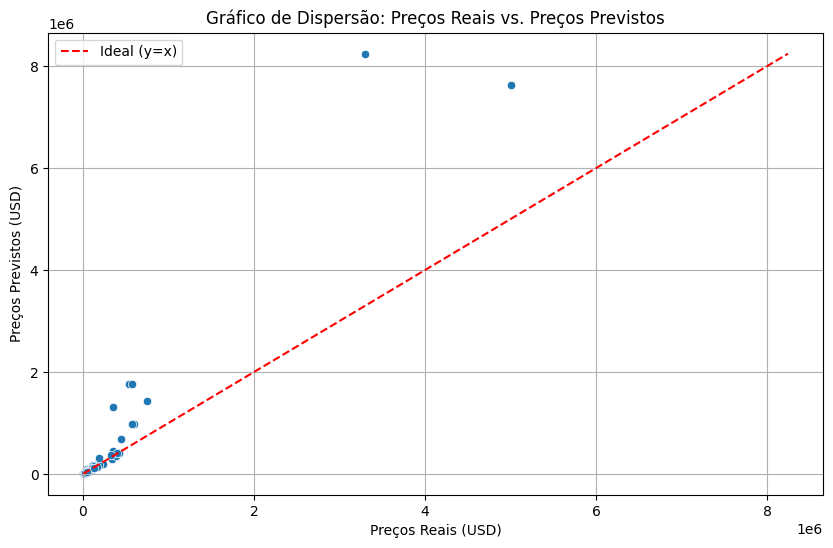

In [40]:
# prompt: grafico de dispersão reais vs previstos

import matplotlib.pyplot as plt
# Gerar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Gráfico de Dispersão: Preços Reais vs. Preços Previstos')
plt.xlabel('Preços Reais (USD)')
plt.ylabel('Preços Previstos (USD)')
plt.grid(True)

# Adicionar a linha y=x para visualização ideal
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal (y=x)')
plt.legend()

plt.show()

In [41]:
# prompt: gerar conclusões com base nos resultados obtidos.

print("\nConclusões:")
print("Com base na análise e modelagem, podemos tirar as seguintes conclusões:")
print(f"- As features selecionadas pelo SelectKBest para prever o preço dos carros foram: {list(selected_features)}")
print(f"- O modelo de Regressão Random Forest, treinado com essas features, obteve um R² de {r2:.2f}.")
if r2 > 0.7:
    print("- Um R² acima de 0.7 sugere que o modelo explica uma proporção considerável da variância nos preços, indicando um bom ajuste aos dados de teste.")
elif r2 > 0.4:
     print("- Um R² entre 0.4 e 0.7 indica que o modelo tem alguma capacidade preditiva, mas ainda há uma variação significativa nos preços que não é explicada pelas features selecionadas.")
else:
    print("- Um R² baixo (< 0.4) sugere que as features selecionadas não são fortes preditoras do preço, ou que o modelo escolhido não é o mais adequado para este conjunto de dados.")
print(f"- O Erro Quadrático Médio da Raiz (RMSE) do modelo foi de {rmse:.2f}. Este valor representa o desvio padrão dos resíduos (erros de previsão).")
print("- Um RMSE menor indica que as previsões do modelo estão, em média, mais próximas dos valores reais.")
print("Observações adicionais:")
print("- A qualidade das previsões pode ser visualizada no gráfico de dispersão, onde pontos próximos à linha vermelha tracejada (y=x) indicam previsões mais precisas.")
print("- É importante notar que a performance do modelo depende da qualidade e representatividade dos dados utilizados.")
print("- Para melhorar o modelo, poderiam ser exploradas outras features, técnicas de feature engineering, outros algoritmos de machine learning ou ajuste de hiperparâmetros do modelo atual.")



Conclusões:
Com base na análise e modelagem, podemos tirar as seguintes conclusões:
- As features selecionadas pelo SelectKBest para prever o preço dos carros foram: [np.str_('Engine_CC'), np.str_('HorsePower'), np.str_('TopSpeed_kmh'), np.str_('Torque_Nm'), np.str_('Seats')]
- O modelo de Regressão Random Forest, treinado com essas features, obteve um R² de -0.01.
- Um R² baixo (< 0.4) sugere que as features selecionadas não são fortes preditoras do preço, ou que o modelo escolhido não é o mais adequado para este conjunto de dados.
- O Erro Quadrático Médio da Raiz (RMSE) do modelo foi de 397308.33. Este valor representa o desvio padrão dos resíduos (erros de previsão).
- Um RMSE menor indica que as previsões do modelo estão, em média, mais próximas dos valores reais.
Observações adicionais:
- A qualidade das previsões pode ser visualizada no gráfico de dispersão, onde pontos próximos à linha vermelha tracejada (y=x) indicam previsões mais precisas.
- É importante notar que a perform